<a href="https://colab.research.google.com/github/lawakobadu/Kelompok-1-APM/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import dataset
dataset = pd.read_csv('Pengunjung_mall.csv')
x = dataset.iloc[:, [3,4]].values
dataset.iloc[:, [3,4]]

,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


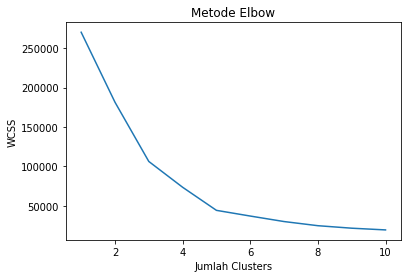

In [4]:
#menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans #import library kmeans
wcss = [] #membuat list wcss
for i in range(1, 11): #membuat perintah looping sebanyak 10 kali
    #algoritma k-means
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) #perintah agar algorima k-means mengolah data x
    wcss.append(kmeans.inertia_) #perintah utk menghitung wcss
plt.plot(range(1, 11), wcss) #perintah utk menampilkan plot
#printah plot utk estetika
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show() #perintah utk menampilkan plot

In [5]:
#menjalakan k-means clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

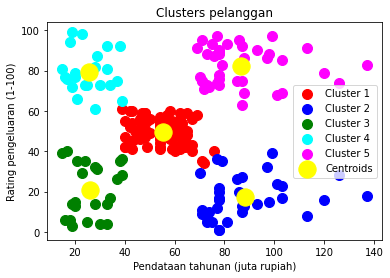

In [6]:
#visualisasi hasil clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters pelanggan')
plt.xlabel('Pendataan tahunan (juta rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()